# 2022F-BSE-014

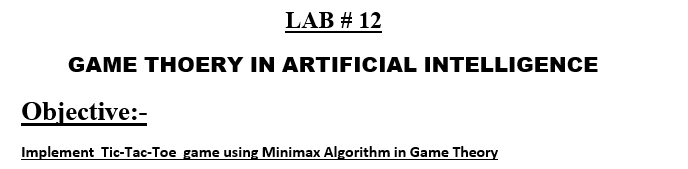

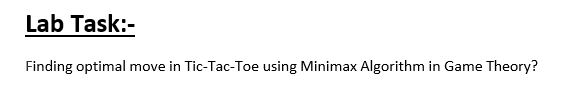

In [10]:
# Tic-Tac-Toe implementation with Minimax Algorithm

# Represent the board as a 3x3 matrix
board = [
    ['_', '_', '_'],
    ['_', '_', '_'],
    ['_', '_', '_']
]

# Function to print the board
def print_board(board):
    for row in board:
        print(" | ".join(row))
    print("\n")

# Function to check if there are moves left
def is_moves_left(board):
    for row in board:
        if '_' in row:
            return True
    return False

# Function to evaluate the board
def evaluate(board, depth):
    # Check rows for victory
    for row in board:
        if row[0] == row[1] == row[2] and row[0] != '_':
            return 10 - depth if row[0] == 'X' else -10 + depth

    # Check columns for victory
    for col in range(3):
        if board[0][col] == board[1][col] == board[2][col] and board[0][col] != '_':
            return 10 - depth if board[0][col] == 'X' else -10 + depth

    # Check diagonals for victory
    if board[0][0] == board[1][1] == board[2][2] and board[0][0] != '_':
        return 10 - depth if board[0][0] == 'X' else -10 + depth
    if board[0][2] == board[1][1] == board[2][0] and board[0][2] != '_':
        return 10 - depth if board[0][2] == 'X' else -10 + depth

    # No winner
    return 0

# Minimax function
def minimax(board, depth, is_maximizing):
    score = evaluate(board, depth)

    # If a terminal state is reached
    if score != 0:
        return score
    if not is_moves_left(board):
        return 0

    if is_maximizing:
        best = -float('inf')
        for i in range(3):
            for j in range(3):
                if board[i][j] == '_':
                    board[i][j] = 'X'
                    best = max(best, minimax(board, depth + 1, False))
                    board[i][j] = '_'
        return best
    else:
        best = float('inf')
        for i in range(3):
            for j in range(3):
                if board[i][j] == '_':
                    board[i][j] = 'O'
                    best = min(best, minimax(board, depth + 1, True))
                    board[i][j] = '_'
        return best

# Function to find the best move
def find_best_move(board):
    best_val = -float('inf')
    best_move = (-1, -1)

    for i in range(3):
        for j in range(3):
            if board[i][j] == '_':
                board[i][j] = 'X'
                move_val = minimax(board, 0, False)
                board[i][j] = '_'
                if move_val > best_val:
                    best_val = move_val
                    best_move = (i, j)

    return best_move

# Main game loop for testing
print("Initial Board:")
print_board(board)

# Example: Make moves manually or find optimal move for X
while is_moves_left(board):
    # Player X (AI) makes a move
    print("AI is calculating the best move...")
    best_move = find_best_move(board)
    if best_move == (-1, -1):  # No moves left
        break
    board[best_move[0]][best_move[1]] = 'X'
    print("AI placed 'X' at:", best_move)
    print_board(board)

    # Check for game over
    if evaluate(board, 0) == 10:
        print("AI wins!")
        break
    elif not is_moves_left(board):
        print("It's a draw!")
        break

    # Player O (manual input)
    print("Your turn (Enter row and column):")
    row, col = map(int, input().split())
    if board[row][col] == '_':
        board[row][col] = 'O'
    else:
        print("Invalid move! Try again.")
        continue

    print_board(board)

    # Check for game over
    if evaluate(board, 0) == -10:
        print("You win!")
        break
    elif not is_moves_left(board):
        print("It's a draw!")
        break


Initial Board:
_ | _ | _
_ | _ | _
_ | _ | _


AI is calculating the best move...
AI placed 'X' at: (0, 0)
X | _ | _
_ | _ | _
_ | _ | _


Your turn (Enter row and column):


 0 1


X | O | _
_ | _ | _
_ | _ | _


AI is calculating the best move...
AI placed 'X' at: (1, 0)
X | O | _
X | _ | _
_ | _ | _


Your turn (Enter row and column):


 2 0


X | O | _
X | _ | _
O | _ | _


AI is calculating the best move...
AI placed 'X' at: (1, 1)
X | O | _
X | X | _
O | _ | _


Your turn (Enter row and column):


 2 2


X | O | _
X | X | _
O | _ | O


AI is calculating the best move...
AI placed 'X' at: (1, 2)
X | O | _
X | X | X
O | _ | O


AI wins!


# From git hub: